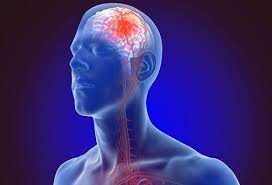

# Attribute Information

##### 1) id: unique identifier
##### 2) gender: "Male", "Female" or "Other"
##### 3) age: age of the patient
##### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
##### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
##### 6) ever_married: "No" or "Yes"
###### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
##### 38) Residence_type: "Rural" or "Urban"
###### 9) avg_glucose_level: average glucose level in blood
###### 10) bmi: body mass index
###### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
###### 12) stroke: 1 if the patient had a stroke or 0 if not
##### *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# about the data :
##### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
##### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# importing the libraries :

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
import pickle
warnings.filterwarnings("ignore")

# Reading the data :

In [61]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [62]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [63]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [64]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#here we check if there is missing values or not 
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#here we find that there is a missing values in bmi 

# dealing with missing values :

In [9]:
#here we find that we have to use mean to deal with missing values cuz of the number os the ,issing values 

In [10]:
print(data['bmi'].mean())
print(data['bmi'].median())

28.893236911794673
28.1


In [11]:
bmi_mean=data['bmi'].mean()
data['bmi']=data['bmi'].fillna(bmi_mean)


In [12]:
data['bmi'].isnull().sum()
#here we check the data so we find that there is no missing values 

0

In [13]:
df=data.copy() #copy of our data 

<AxesSubplot:>

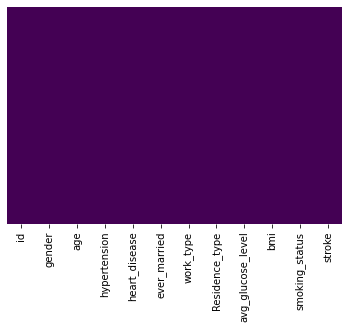

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

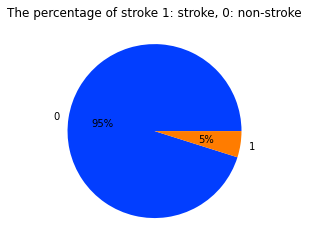

In [15]:
data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("The percentage of stroke 1: stroke, 0: non-stroke");
#There is 201 null BMI values on the dataset. Additionally the data is imbalance therefore we need to solve these issues for better results.

In [16]:
#There is 201 null BMI values on the dataset. Additionally the data is imbalance therefore we need to solve these issues for better results.

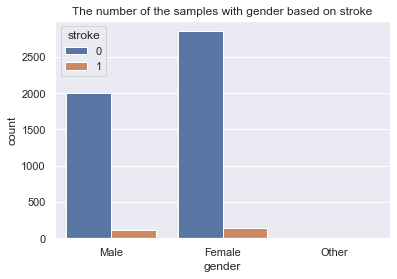

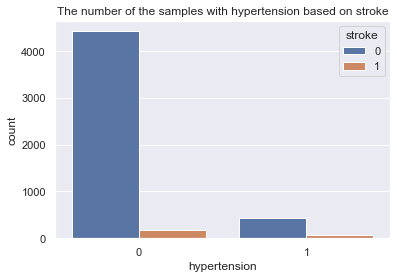

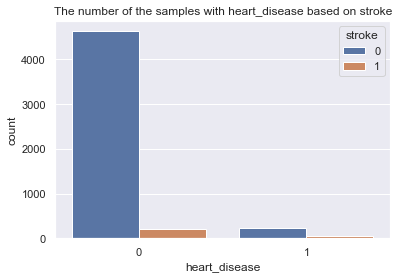

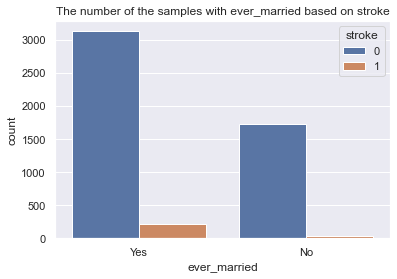

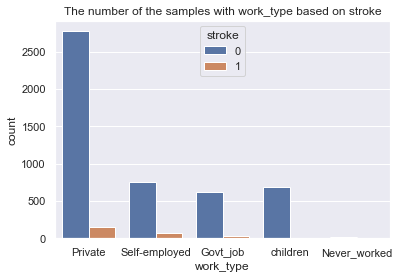

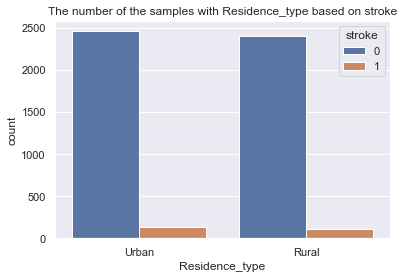

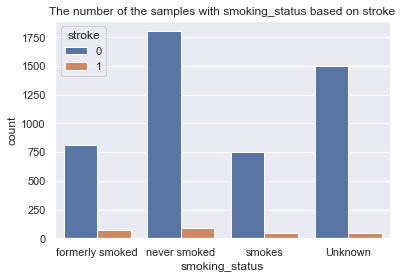

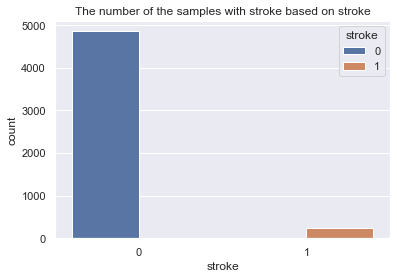

In [17]:
# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'darkgrid')
for i in df.columns[1:]:  # exclude stroke column
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

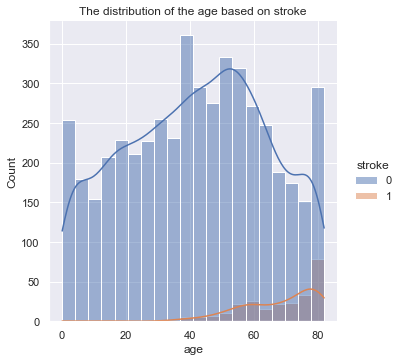

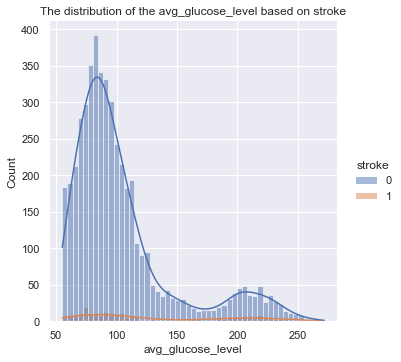

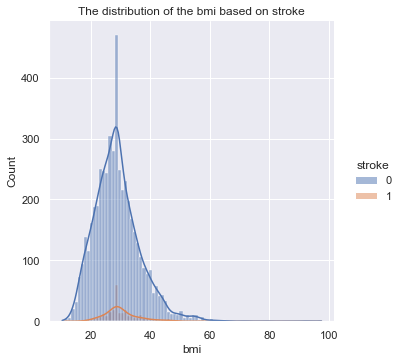

In [18]:
sns.set_theme(style = 'darkgrid')
for i in df.columns[:-1]: # exclude stroke column
    if df[i].dtype == 'float64':
            sns.displot(data = df, x = i, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(i))
            plt.show()

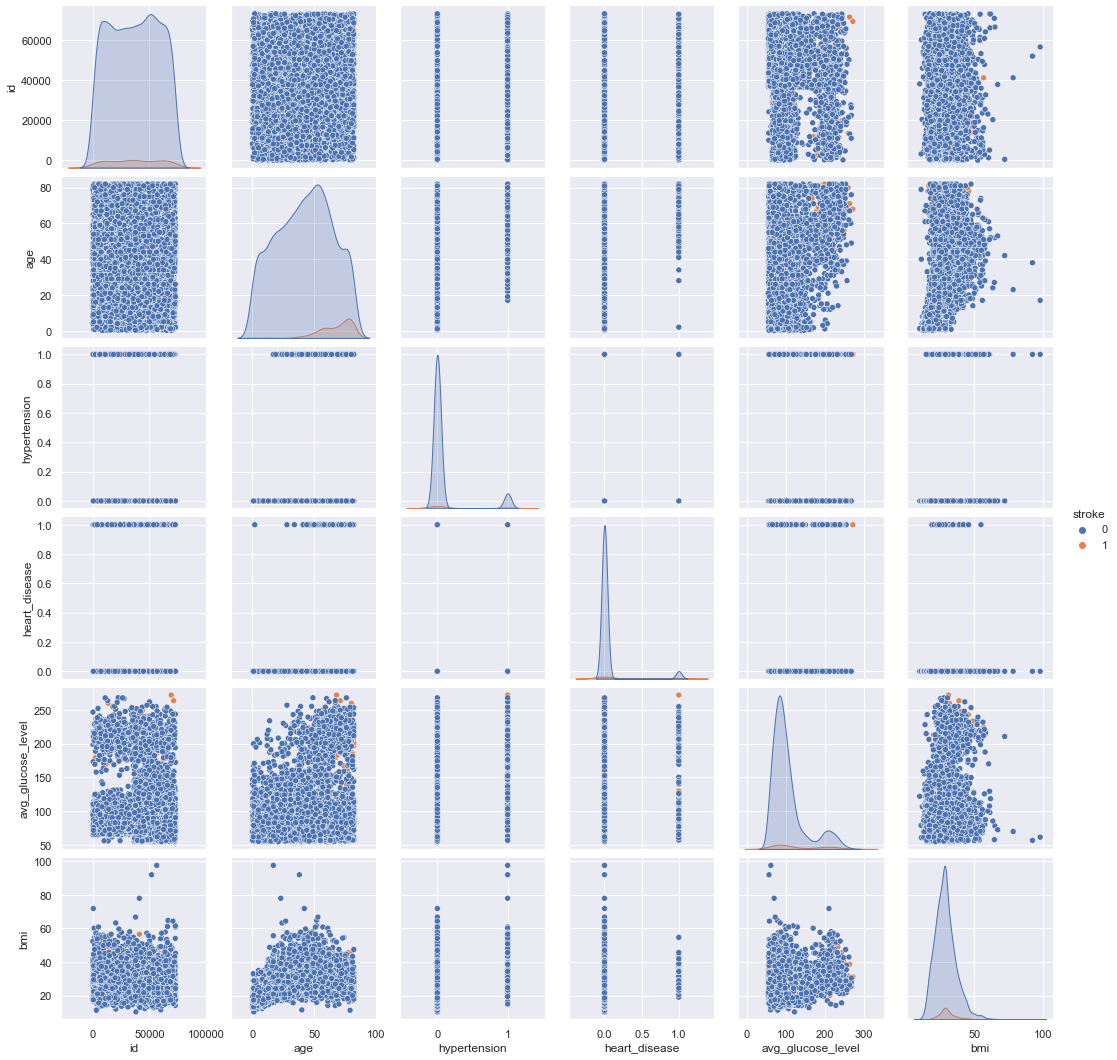

In [19]:
sns.pairplot(data=df,hue='stroke')

# preprocessing :

# encoding :

In [20]:
# Categorical Columns: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

# Initialize One Hot Encoder
one_hot_encoder = OneHotEncoder()
# Fit and Transform the columns
df_temp = one_hot_encoder.fit_transform(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()

# Get newly encoded columns and concat them to the Dataframe
encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
df = pd.concat([df,encodings] , axis=1)

# Drop original columns from the dataset after encoding is done
df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis = 1, inplace=True)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [21]:
df.drop('id', inplace=True, axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


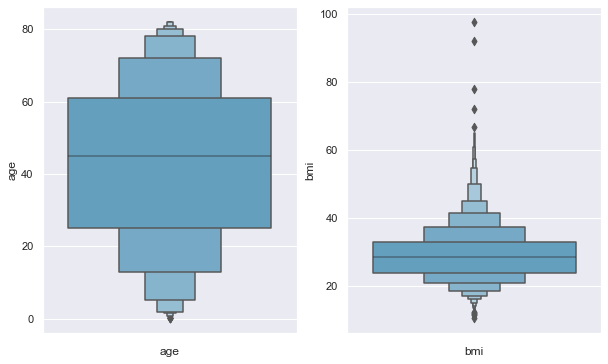

In [22]:
# Set seaborn style palette
sns.set_theme(style="darkgrid", palette="icefire")

# Array of columns that we would like to plot
cols = ['age','bmi']

# Instantiate figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Draw a Boxen Plot for each column in question
for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

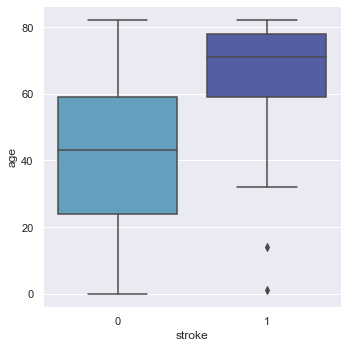

In [23]:
sns.catplot(data=df, x="stroke", y="age", kind="box") #checking for outliers

In [24]:


indexAge = data[((df['age'] < 20) & (df['stroke'] == 1)) ].index  #find the indexes of outliers
data.drop(indexAge , inplace=True) # drop the outliers



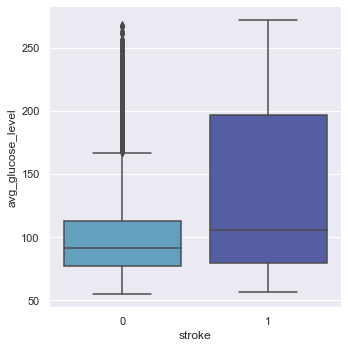

In [25]:
sns.catplot(data=df, x="stroke", y="avg_glucose_level", kind="box")

In [26]:
indexAge = data[((df['avg_glucose_level'] > 220) & (df['stroke'] == 0)) ].index
data.drop(indexAge , inplace=True)

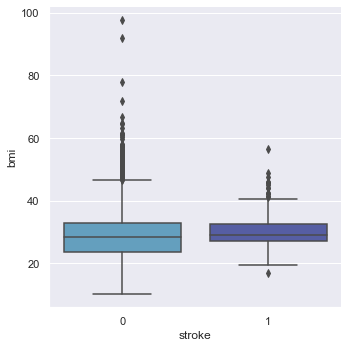

In [27]:
sns.catplot(data=df, x="stroke", y="bmi", kind="box")

In [28]:
indexAge = data[((df['bmi'] > 50) & (df['stroke'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bmi'] > 40) & (df['stroke'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bmi'] < 19) & (df['stroke'] == 1)) ].index
indexAge.shape
data.drop(indexAge , inplace=True)

In [29]:
#we find that 'age' has no outliers and 'bmi' has outlier values > 80. These can be deleted


In [30]:
#drop bmi 
# Display rows with 'bmi' > 80
display(df[df['bmi'] > 80])

# Drop rows
df.drop(df.index[df['bmi'] > 80], inplace=True)

# Reset index of dataframe
df = df.reset_index(drop = True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2128,17.0,1,0,61.67,97.6,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4209,38.0,1,0,56.90,92.0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


0    4859
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

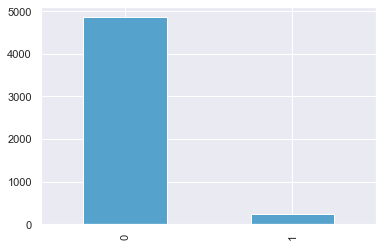

In [31]:
##### show the value counts of the calsses in the target
#we can find data impalance
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

# split the data :

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
X = df.drop(['stroke'],axis=1)
y = df['stroke'].to_frame()

In [34]:
X_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [35]:
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)


0    4859
1     249
Name: stroke, dtype: int64


<AxesSubplot:>

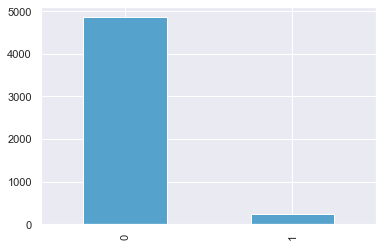

In [36]:
# show the value counts of the calsses in the target
# we can find data impalance
print(df['stroke'].value_counts())
df['stroke'].value_counts().sort_index().plot.bar()

In [37]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']
X_over, y_over = oversample.fit_resample(X, y)

In [38]:
# Apply oversampling
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y.ravel())



1    4859
0    4859
Name: stroke, dtype: int64


<AxesSubplot:>

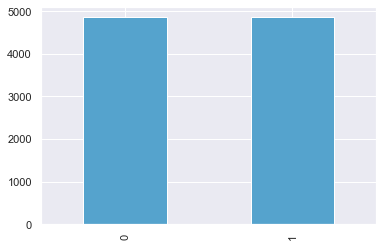

In [39]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

# modeling :

In [40]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt

In [41]:
### Models to be used for ML


In [42]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(X_balanced, y_balanced)

y_pred_train_xgb = xgb.predict(X_balanced)
acc_train_xgb = accuracy_score(y_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

0.9826095904507101
0.9600626468285043
Precision: 0.939
Recall: 0.388
F-measure: 0.549
ROC AUC Score: 0.972953216374269


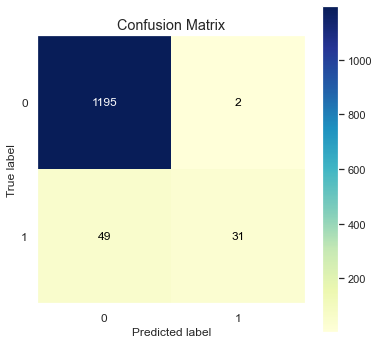

In [43]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

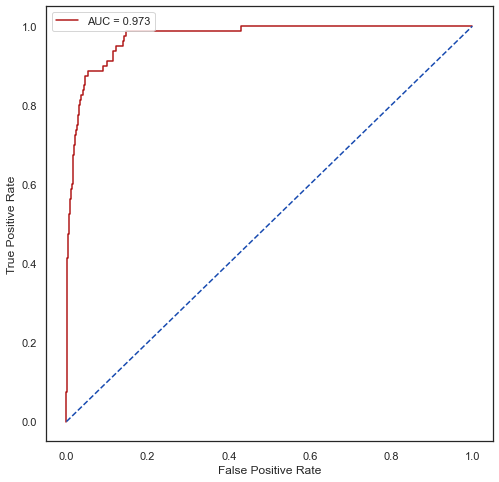

In [44]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [45]:
svc = SVC(C=10, gamma=1000 ,probability= True)
svc.fit(X_balanced, y_balanced)

y_pred_train_svc = svc.predict(X_balanced)
acc_train_svc = accuracy_score(y_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

1.0
1.0
Precision: 1.000
Recall: 1.000
F-measure: 1.000
ROC AUC Score: 1.0


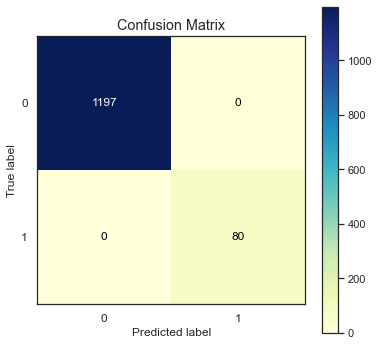

In [46]:


skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');



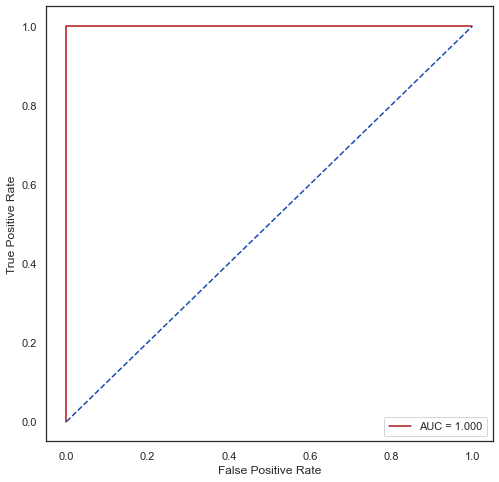

In [47]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [48]:

dt =DecisionTreeClassifier(max_features=5 , max_depth=12,criterion = 'entropy', random_state=0)
dt.fit(X_balanced, y_balanced)

y_pred_train_dt = dt.predict(X_balanced)
acc_train_dt = accuracy_score(y_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

0.9453591273924676
0.9021143304620204
Precision: 0.331
Recall: 0.550
F-measure: 0.413
ROC AUC Score: 0.9288272765246449


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

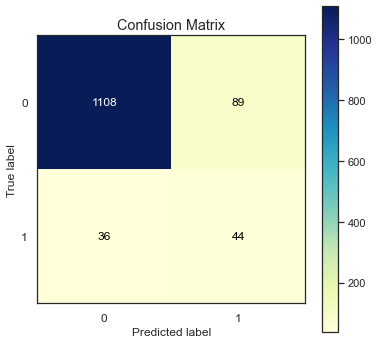

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

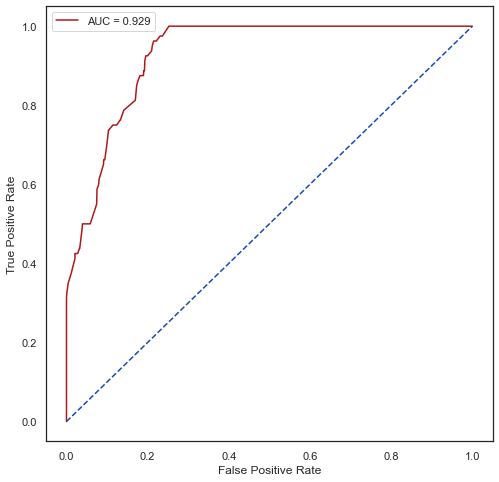

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [51]:

rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(X_balanced,y_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [52]:
y_pred_train_rf = rf.predict(X_balanced)
acc_train_rf = accuracy_score(y_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

1.0
1.0


In [53]:
rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)



Precision: 1.000
Recall: 1.000
F-measure: 1.000


In [54]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 1.0


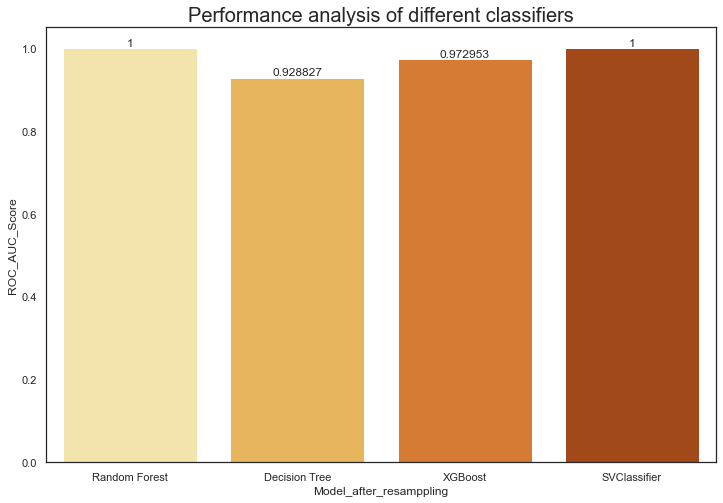

In [55]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['Random Forest','Decision Tree','XGBoost','SVClassifier'],
        'Score': [acc_test_rf, acc_test_dt, acc_test_xgb, acc_test_svc],
        
        'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, xgb_roc_auc_score, svc_roc_auc_score]
    }
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="ROC_AUC_Score", data= Performance, palette="YlOrBr")
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different classifiers',fontsize=20)
plt.show()

In [56]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Score,ROC_AUC_Score
0,Random Forest,1.000000,1.000000
3,SVClassifier,1.000000,1.000000
2,XGBoost,0.960063,0.972953
1,Decision Tree,0.902114,0.928827


# conclusion :
    here we find that the best model is random forest with acc 96%